In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Position_Salaries.csv')
print(data)
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
print(x,y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [3]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(len(y),1))
print(x,y)
s_x = sc_x.transform([[6.5]])
print(s_x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]
[[0.34815531]]


In [4]:
from sklearn.svm import SVR


reg = SVR(kernel = 'rbf')
reg.fit(x,y)

C:\Users\pra19\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [5]:
s_x = sc_x.transform([[6.5]])
print(s_x)
pred_y = reg.predict(s_x)
print(pred_y)
t_pred_y = sc_y.inverse_transform([pred_y])
print(t_pred_y)

[[0.34815531]]
[-0.27861589]
[[170370.0204065]]


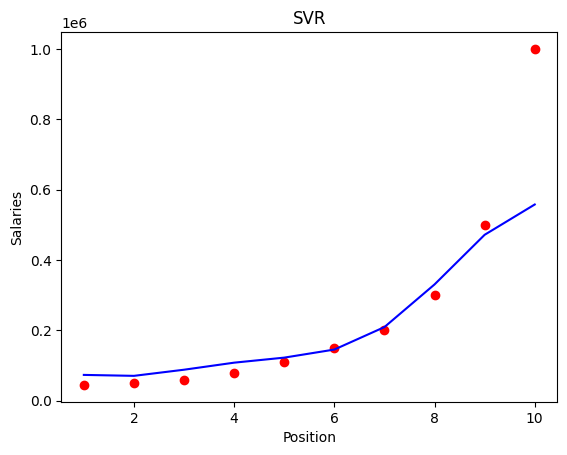

In [11]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red') 
plt.title('SVR')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(reg.predict(x).reshape(-1,1)),color='blue')
plt.xlabel('Position')
plt.ylabel('Salaries')
plt.show()